In [ ]:
'''
Step-by-Step Implementation:
1-Load and Preprocess the Data
2-Define Logistic Function and Log-Likelihood
3-Compute Gradient and Perform Gradient Ascent
4-Train the Model
5-Evaluate the Model
'''

In [5]:
# Load packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# We will use only two classes (binary classification)
binary_classes = y < 2
X = X[binary_classes]
y = y[binary_classes]

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Add intercept term to X_train and X_test
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

In [3]:
# Logistic function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def log_likelihood(X, y, theta):
    z = np.dot(X, theta)
    ll = np.sum(y * z - np.log(1 + np.exp(z)))
    return ll

# Gradient of the log-likelihood
def gradient(X, y, theta):
    z = np.dot(X, theta)
    grad = np.dot(X.T, y - sigmoid(z))
    return grad

# Gradient ascent to maximize log-likelihood
def gradient_ascent(X, y, lr=0.1, iterations=1000):
    theta = np.zeros(X.shape[1])
    ll_values = []
    for i in range(iterations):
        grad = gradient(X, y, theta)
        theta += lr * grad
        if i % 100 == 0:
            ll = log_likelihood(X, y, theta)
            ll_values.append(ll)
            print(f'Iteration {i}: Log-Likelihood = {ll}')
    return theta, ll_values

Iteration 0: Log-Likelihood = -0.04207253553981846
Iteration 100: Log-Likelihood = -0.022317077134712725
Iteration 200: Log-Likelihood = -0.016165041468990428
Iteration 300: Log-Likelihood = -0.013182502211786143
Iteration 400: Log-Likelihood = -0.011393999386273411
Iteration 500: Log-Likelihood = -0.010169863151205386
Iteration 600: Log-Likelihood = -0.00925492938685748
Iteration 700: Log-Likelihood = -0.008529397029990117
Iteration 800: Log-Likelihood = -0.007930537081648543
Iteration 900: Log-Likelihood = -0.007422398347240197


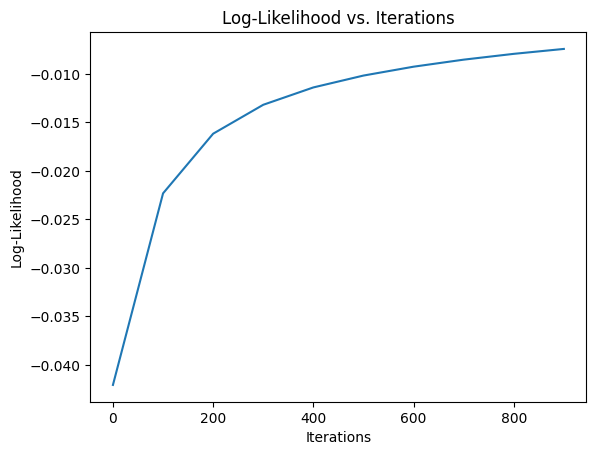

Accuracy: 100.00%
Confusion Matrix:
[[10  0]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [6]:
# Train the logistic regression model
theta, ll_values = gradient_ascent(X_train, y_train)

# Plot log-likelihood values
plt.plot(range(0, 1000, 100), ll_values)
plt.xlabel('Iterations')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Iterations')
plt.show()

# Predict class labels for test data
def predict(X, theta):
    probs = sigmoid(np.dot(X, theta))
    return (probs >= 0.5).astype(int)

# Predictions and evaluation
y_pred = predict(X_test, theta)

# Accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))